In [2]:
import matplotlib as plt
import pandas as pd
import polars
import sklearn as sk
import lightgbm
import joblib
# import cudf
# import catboost
# import xgboost
import optuna
# import bayes_opt
# import hyperopt
import seaborn as sns

In [7]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,58645.0,29322.000000,16929.497605,0.00,14661.00,29322.00,43983.00,58644.00
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106979,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


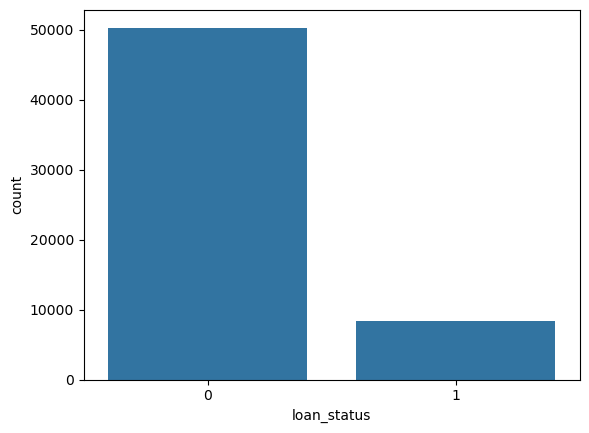

In [9]:
sns.countplot(x=train['loan_status']);

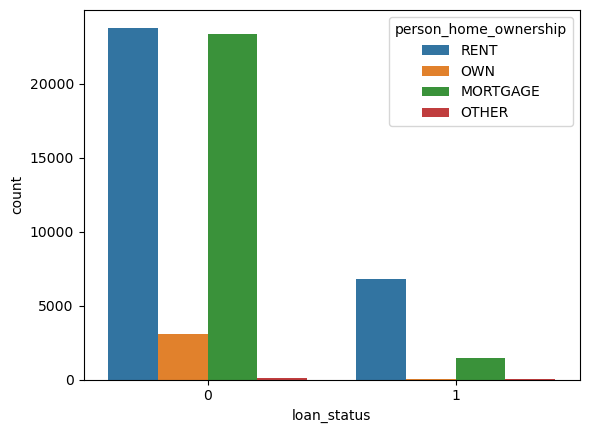

In [11]:
sns.countplot(x=train['loan_status'], hue=train['person_home_ownership']);

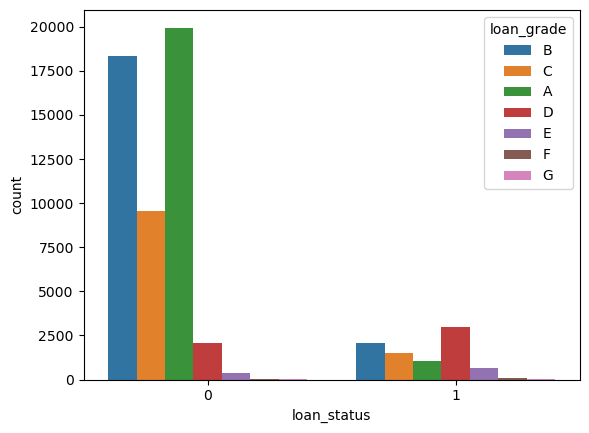

In [12]:
sns.countplot(x=train['loan_status'], hue=train['loan_grade']);


честно говоря не понял почему именно категории D больше всего кредитов дали

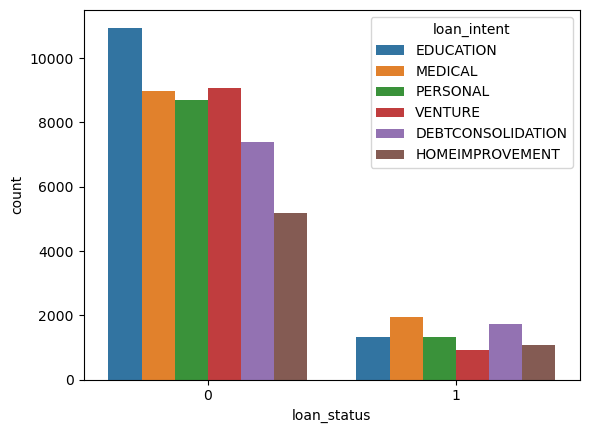

In [13]:
sns.countplot(x=train['loan_status'], hue=train['loan_intent']);

все логично

<Axes: xlabel='loan_status', ylabel='count'>

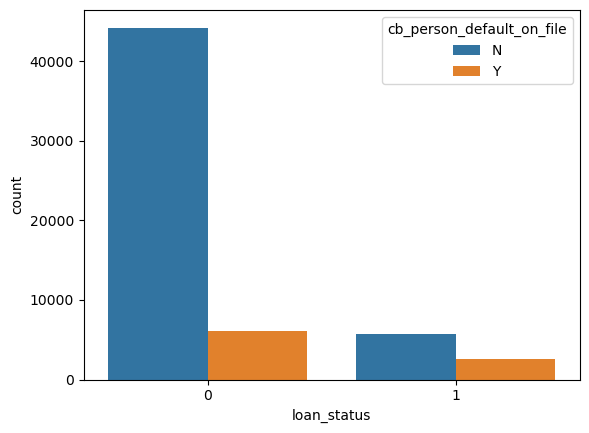

In [14]:
sns.countplot(x=train['loan_status'], hue=train['cb_person_default_on_file'])


логично но ожидалось большего влияния дефолтности

<Axes: xlabel='loan_status', ylabel='count'>

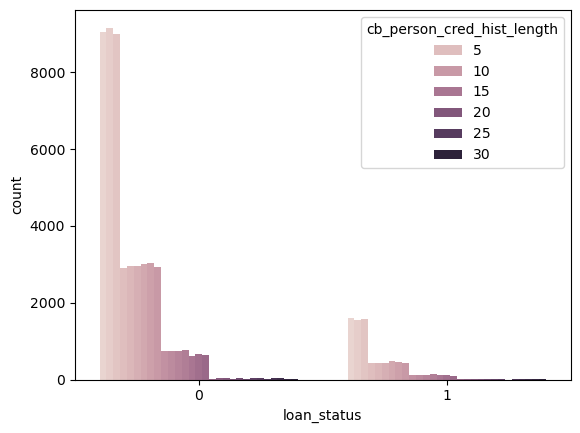

In [23]:
sns.countplot(x=train['loan_status'], hue=train['cb_person_cred_hist_length'])


старикам не выдают очев,остальное более менее понятно

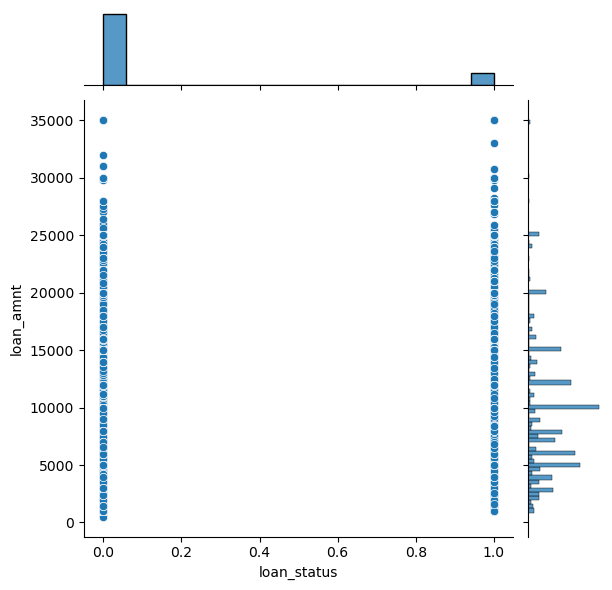

In [68]:
sns.jointplot(x=train['loan_status'], y=train['loan_amnt'])

среднее значение в районе 9,банки выдают в районе 10

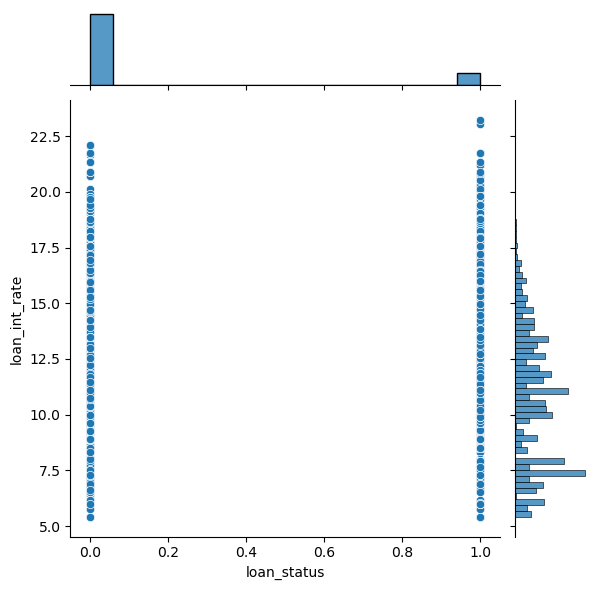

In [67]:
sns.jointplot(x=train['loan_status'], y=train['loan_int_rate'])

банки любят займы под проценты 7.5(без риска) и 11.5-14

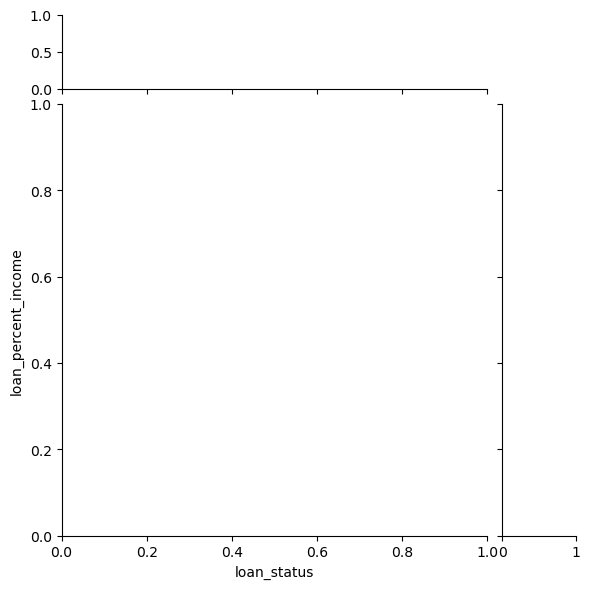

In [76]:
# sns.JointGrid(data= train,x='loan_status', y='loan_percent_income',marginal_ticks=True)

видно хорошее распределение банки хотят получить хотя бы 10 процентов

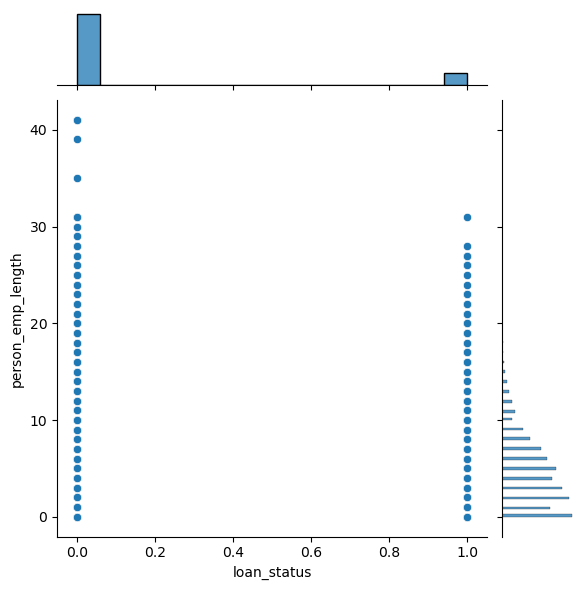

In [71]:
sns.jointplot(x=train['loan_status'], y=train['person_emp_length'].where(train['person_emp_length'] < 50))

есть 2 120 летних работяги